#Building a training data set

The aim of this script is to read data from the MBED accelerometer and a pressure sensor to build a training data set.

First, individual events will be recorded using the accelerometer and pressure sensor. The events will be saved in the matrix ${\bf e_{M}}$. The matrix will have four columns, acceleration in $x_{N}, y_{N}, z_{N}$ and pressure $p_{N}$, and it will have $N$ rows.

$$
{\rm event~matrix:~~~} {\bf e_{M}}~=~\left[
\begin{matrix}
x_{1} & y_{1} & z_{1} & p_{1}\\
x_{2} & y_{2} & z_{2}& p_{2}\\
\vdots & \vdots & \vdots & \vdots\\ 
x_{N} & y_{N} & z_{N} & p_{N}\\
\end{matrix}
\right]
$$

Each matrix will be exported into a file with the header indicating the type of event, which are encoded as follows:

```
walk = 0
stand = 1
sit down = 2
lie down = 3
fall = 4
motionless = 5
```

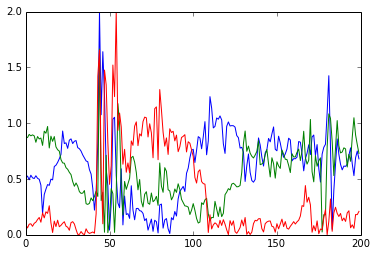

In [60]:
import serial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = open('fall_data_set.dat','w')
#headerLine = ("X \t Y \t Z \n")
#data.write(headerLine)

ser = serial.Serial('/dev/tty.usbmodem1412',9600)

n_rows = 200
n_parameters = 3

e_M = np.zeros(shape=(n_rows,n_parameters))
it = 0

try:
    while it < n_rows:
        #print it
        try:
            line = ser.readline()   
            line = line.strip() #removes trailing whitespaces at start&end of string   
            buf = np.array([float(val) for val in line.split()])
            if(len(buf)==3):
                #print buf
                e_M[it] = buf
                it += 1
        except:
            continue 
except:
    pass

plt.plot(e_M)
plt.show()

np.savetxt('event49.txt',e_M,header='4')

ser.close()

Now, a feature matrix ${\bf X}$ is constructed in which each line contains one event $e_{M}$. The element $a_{M}$ in the accompanying label vector $A$ will indicate what type of event $e_{M}$ is, *e.g.* ``fall`` or ``sit down``.

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
e_{1}\\
e_{2}\\
\vdots\\ 
e_{M}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf A}~=~ [a_1, a_2, \cdots a_M]
$$

In [73]:
import numpy as np

n_rows = 200
n_parameters = 3
n_events = 50

X = np.zeros((n_rows,n_parameters,n_events), dtype=float)
A = np.zeros(n_events, dtype=int)

print X.shape

for i in range(n_events):
    
    #read files and create feature matrix X
    filename = 'event'+str(i)+'.txt'
    e_M = np.loadtxt(filename, dtype=float)
    X[:,:,i] = e_M
    
    #read file headers and create label vector A
    f = open(filename,'r')
    line = f.readline()
    f.close()
    a_M = line.split()[1]
    A[i] = a_M
    
print X
print A

np.save('X.npy',X)
np.save('A.npy',A)

(200, 3, 50)
[[[ 0.007812  0.366943  0.546631 ...,  0.522217  0.406006  0.515381]
  [ 0.130371  0.949707  0.808594 ...,  0.874023  0.377686  0.873047]
  [ 0.998047  0.123047  0.080078 ...,  0.041016  0.847656  0.089844]]

 [[ 0.003906  0.36499   0.548584 ...,  0.526611  0.361572  0.526123]
  [ 0.123047  0.834961  0.751953 ...,  0.879395  0.4104    0.871094]
  [ 0.998047  0.086914  0.105469 ...,  0.06543   0.833008  0.061523]]

 [[ 0.365967  0.400146  0.483154 ...,  0.518311  0.477295  0.49292 ]
  [ 0.914551  0.836914  0.877441 ...,  0.873047  0.677734  0.899414]
  [ 0.171875  0.067383  0.066406 ...,  0.051758  0.193848  0.095215]]

 ..., 
 [[ 0.253662  0.249756  0.525146 ...,  0.007812  0.778076  0.691162]
  [ 0.903809  0.96582   0.875977 ...,  0.12085   0.640625  0.893555]
  [ 0.188965  0.155273  0.144287 ...,  1.018555  0.188232  0.181641]]

 [[ 0.259521  0.359619  0.515381 ...,  0.013428  0.770752  0.750732]
  [ 0.905273  0.979492  0.859375 ...,  0.126709  0.615234  0.807617]
  [ 0.